In [2]:
#2021.06.28. MON 
#Hankyeong

#00. 패키지 호출
import numpy as np
import pandas as pd 
import tensorflow as tf 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

#00-1. 씨드넘버 정의하기. 
np.random.seed(2021)
tf.random.set_seed(2021)


In [3]:
#03. 피마인디언 데이터셋으로 당뇨병 예측(분류)하기. 
#(1) 데이터셋 불러오기. 
diabetes = pd.read_csv('../../data/pima-indians-diabetes.csv')
diabetes

,Number_of_times_pregnant,Plasma_glucose_concentration_a_2_hours_in_an_oral_glucose_tolerance_test,Diastolic_blood_pressure,Triceps_skin_fold_thickness,Hour_serum_insulin,Body_mass_index,Diabetes_pedigree_function,Age,Diabetes_yn
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
#(2) 데이터셋 탐색하기. 
#①행, 열 개수 및 구조 파악하기. 
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   Number_of_times_pregnant                                                  768 non-null    int64  
 1   Plasma_glucose_concentration_a_2_hours_in_an_oral_glucose_tolerance_test  768 non-null    int64  
 2   Diastolic_blood_pressure                                                  768 non-null    int64  
 3   Triceps_skin_fold_thickness                                               768 non-null    int64  
 4   Hour_serum_insulin                                                        768 non-null    int64  
 5   Body_mass_index                                                           768 non-null    float64
 6   Diabetes_pedigree_function                                         

In [5]:
#②요약통계량 확인하기. 
diabetes.describe()

,Number_of_times_pregnant,Plasma_glucose_concentration_a_2_hours_in_an_oral_glucose_tolerance_test,Diastolic_blood_pressure,Triceps_skin_fold_thickness,Hour_serum_insulin,Body_mass_index,Diabetes_pedigree_function,Age,Diabetes_yn
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
#(3) 데이터셋의 결측값 확인하기. 
diabetes.isna().sum()

Number_of_times_pregnant                                                    0
Plasma_glucose_concentration_a_2_hours_in_an_oral_glucose_tolerance_test    0
Diastolic_blood_pressure                                                    0
Triceps_skin_fold_thickness                                                 0
Hour_serum_insulin                                                          0
Body_mass_index                                                             0
Diabetes_pedigree_function                                                  0
Age                                                                         0
Diabetes_yn                                                                 0
dtype: int64

In [7]:
#(4) 데이터프레임 정규화하기. 
scaler = MinMaxScaler()
diabetes_feature_scaled = scaler.fit_transform(diabetes.iloc[:,:-1])
diabetes_scaled = pd.DataFrame(diabetes_feature_scaled)
diabetes_scaled['target'] = diabetes.iloc[:,-1]
diabetes_scaled.columns = list(diabetes.columns)
diabetes_scaled

,Number_of_times_pregnant,Plasma_glucose_concentration_a_2_hours_in_an_oral_glucose_tolerance_test,Diastolic_blood_pressure,Triceps_skin_fold_thickness,Hour_serum_insulin,Body_mass_index,Diabetes_pedigree_function,Age,Diabetes_yn
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000,0
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000,0
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000,0
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333,1


In [8]:
#(5) 데이터셋 분할하기. 
X_train, X_test, y_train, y_test = train_test_split(
    diabetes_scaled.iloc[:,:-1].values, diabetes.iloc[:,-1].values, test_size=0.2, random_state=2021, stratify=diabetes.iloc[:,-1]
)

#(6) 분할한 데이터셋 차원 확인하기. 
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((614, 8), (614,), (154, 8), (154,))

In [9]:
#(7) 모델 정의하기. 
model = Sequential([
    Dense(48, input_shape=(8,), activation='relu'),
    Dense(36, activation='relu'),
    Dense(24, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

#(8) 모델의 요약 정보 확인하기. 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 48)                432       
_________________________________________________________________
dense_1 (Dense)              (None, 36)                1764      
_________________________________________________________________
dense_2 (Dense)              (None, 24)                888       
_________________________________________________________________
dense_3 (Dense)              (None, 16)                400       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 3,501
Trainable params: 3,501
Non-trainable params: 0
_________________________________________________________________


In [10]:
#(9) 모델 환경(compile) 설정하기. 
model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

#(10) 모델 학습하기. 
model_fit = model.fit(
    X_train,y_train,
    validation_split=0.2,
    epochs=75,
    batch_size=75
)

Epoch 1/75
7/7 [==============================] - 0s 19ms/step - loss: 0.6894 - accuracy: 0.5642 - val_loss: 0.6774 - val_accuracy: 0.6341
Epoch 2/75
7/7 [==============================] - 0s 2ms/step - loss: 0.6710 - accuracy: 0.6599 - val_loss: 0.6644 - val_accuracy: 0.6260
Epoch 3/75
7/7 [==============================] - 0s 3ms/step - loss: 0.6579 - accuracy: 0.6578 - val_loss: 0.6549 - val_accuracy: 0.6260
Epoch 4/75
7/7 [==============================] - 0s 2ms/step - loss: 0.6477 - accuracy: 0.6578 - val_loss: 0.6463 - val_accuracy: 0.6260
Epoch 5/75
7/7 [==============================] - 0s 2ms/step - loss: 0.6376 - accuracy: 0.6578 - val_loss: 0.6335 - val_accuracy: 0.6341
Epoch 6/75
7/7 [==============================] - 0s 2ms/step - loss: 0.6263 - accuracy: 0.6619 - val_loss: 0.6195 - val_accuracy: 0.6341
Epoch 7/75
7/7 [==============================] - 0s 2ms/step - loss: 0.6172 - accuracy: 0.6640 - val_loss: 0.6137 - val_accuracy: 0.6341
Epoch 8/75
7/7 [=================

In [11]:
#(11) 모델 예측 및 평가하기. 
accuracy_score = model.evaluate(X_test, y_test)
accuracy_score

5/5 [==============================] - 0s 596us/step - loss: 0.4938 - accuracy: 0.7532


[0.49378204345703125, 0.7532467246055603]

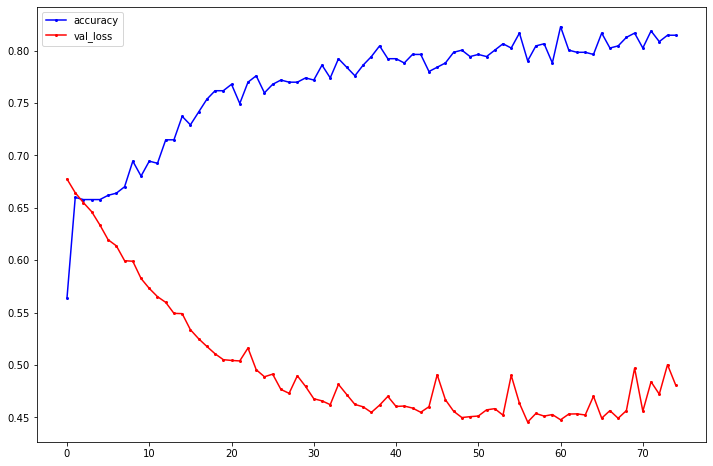

In [12]:
#(12) 모델 훈련 과정 시각화하기. 
y_acc = model_fit.history['accuracy']
y_vloss = model_fit.history['val_loss']
x_len = np.arange(len(y_acc))
plt.figure(figsize=(12,8))
plt.plot(x_len, y_acc, 'bo-', markersize=2, label='accuracy')
plt.plot(x_len, y_vloss, 'ro-', markersize=2, label='val_loss')
plt.legend()
plt.show()